In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('data1972-2023.csv')
df.describe()

,DIRECTION_MAX_GUST1,SPEED_MAX_GUST1,SNOW_ON_GROUND1,TOTAL_PRECIPITATION1,HEATING_DEGREE_DAYS1,COOLING_DEGREE_DAYS1,MIN_REL_HUMIDITY1,MAX_REL_HUMIDITY1,MAX_TEMPERATURE1,MEAN_TEMPERATURE1,...,TOTAL_RAIN3,TOTAL_SNOW3,SNOW_ON_GROUND3,MAX_TEMPERATURE3,MEAN_TEMPERATURE3,MIN_TEMPERATURE3,Value,Year,Month,Day
count,2250.000000,2250.000000,5626.000000,10877.000000,10877.000000,10877.000000,4283.000000,4287.000000,10877.000000,10877.000000,...,8457.000000,8452.000000,10047.000000,18766.000000,18731.000000,18788.000000,19320.000000,19320.000000,19320.000000,19320.000000
mean,23.857333,37.783556,9.873445,1.003563,14.640144,0.059148,41.628998,90.873571,10.405236,3.419003,...,0.977214,0.892097,26.880760,8.296067,2.899648,-2.510704,807.750342,1997.050466,6.533489,15.733282
std,9.193373,5.999614,11.855949,2.954058,10.126739,0.385451,18.499451,8.163853,11.470436,10.219083,...,2.926498,2.669852,34.331648,11.887143,10.753810,10.217679,745.405423,15.268730,3.443978,8.798686
min,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,6.000000,39.000000,-28.500000,-36.600000,...,0.000000,0.000000,0.000000,-34.400000,-39.000000,-45.100000,75.000000,1971.000000,1.000000,1.000000
25%,18.000000,33.000000,0.000000,0.000000,6.400000,0.000000,27.000000,87.000000,2.700000,-2.800000,...,0.000000,0.000000,0.000000,0.400000,-3.500000,-7.700000,224.000000,1984.000000,4.000000,8.000000
50%,23.000000,36.000000,4.000000,0.000000,13.800000,0.000000,38.000000,93.000000,10.500000,4.200000,...,0.000000,0.000000,5.000000,8.600000,3.700000,-1.000000,542.000000,1997.000000,7.000000,16.000000
75%,33.000000,41.000000,17.000000,0.700000,20.800000,0.000000,54.000000,97.000000,19.200000,11.600000,...,0.200000,0.000000,52.000000,17.800000,11.700000,5.200000,1150.000000,2010.000000,10.000000,23.000000
max,36.000000,77.000000,80.000000,89.000000,54.600000,7.800000,97.000000,100.000000,41.200000,25.800000,...,39.000000,33.600000,165.000000,38.700000,27.500000,19.000000,4980.000000,2023.000000,12.000000,31.000000


In [11]:
df = pd.read_csv('data1972-2023.csv')
df['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])

# Labels are the values we want to predict
labels = np.array(df['Value'])
# Remove the labels from the df
# axis 1 refers to the columns
df = df.drop(columns=['Value', 'SYM', 'LOCAL_DATE'])
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
df = np.array(df)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.10, random_state = 4)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (17388, 36)
Training Labels Shape: (17388,)
Testing Features Shape: (1932, 36)
Testing Labels Shape: (1932,)


In [13]:

# Baseline errors, and display average baseline error
baseline_errors = abs(807.750342 - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  576.61


In [14]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 900, random_state = 14)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=900, random_state=14)

In [15]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'cusecs.')

Mean Absolute Error: 151.03 cusecs.


In [16]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.32 %.


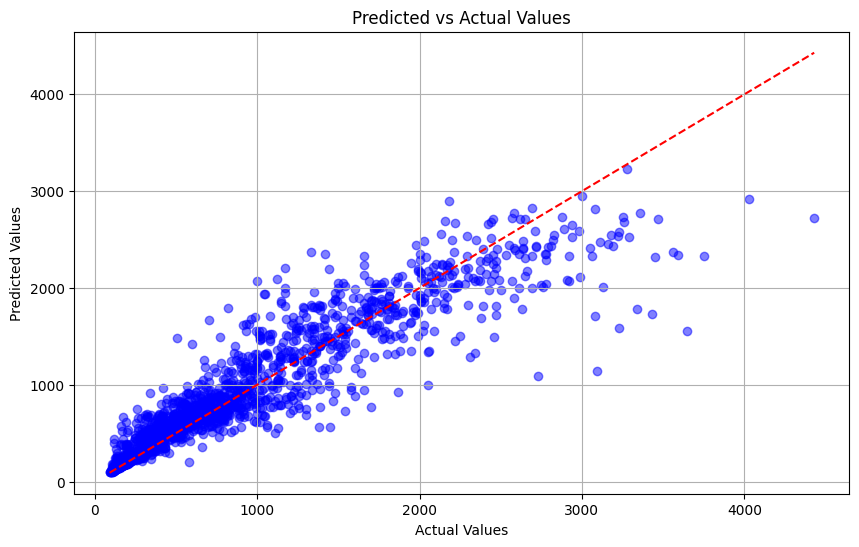

In [17]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predictions, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()

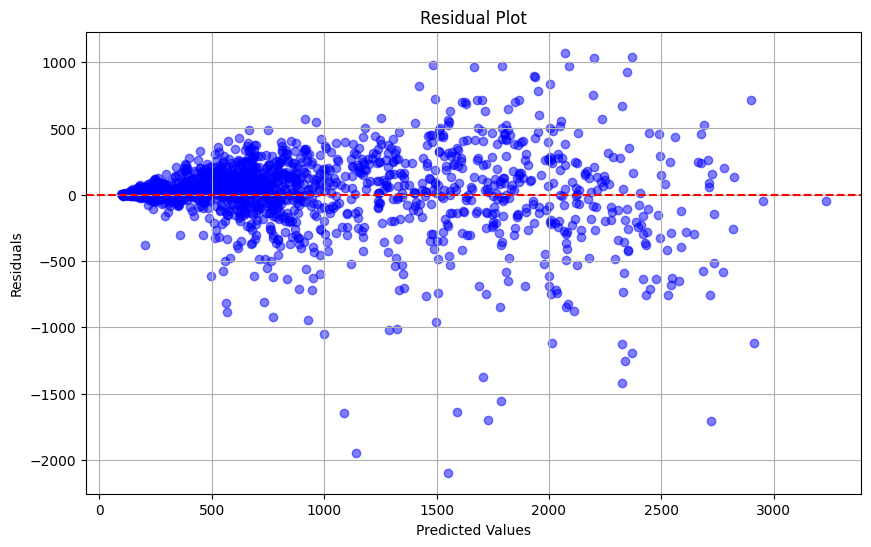

In [18]:
# Calculate residuals
residuals = predictions - test_labels
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

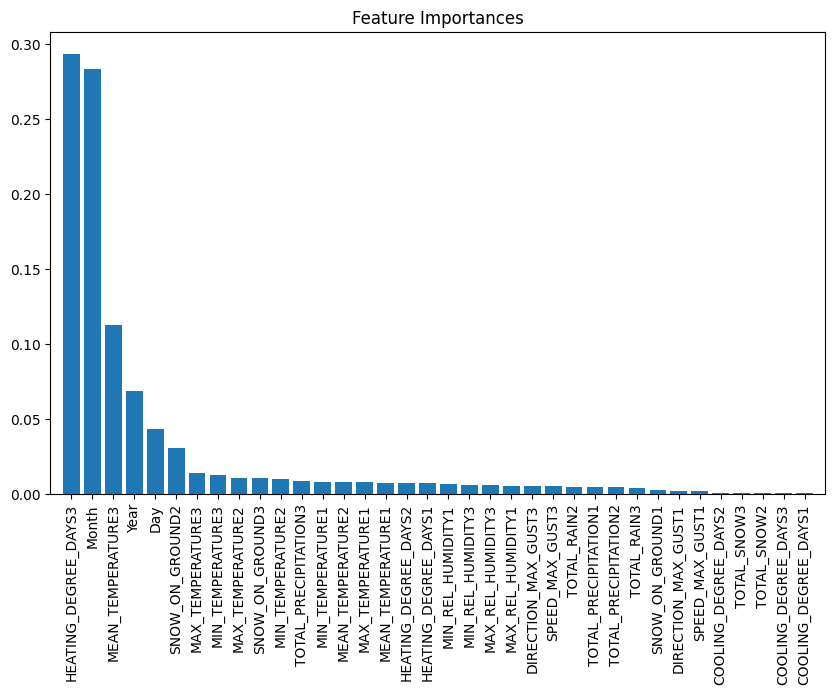

In [19]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(train_features.shape[1]), importances[indices], align='center')
plt.xticks(range(train_features.shape[1]), np.array(feature_list)[indices], rotation=90)
plt.xlim([-1, train_features.shape[1]])
plt.show()

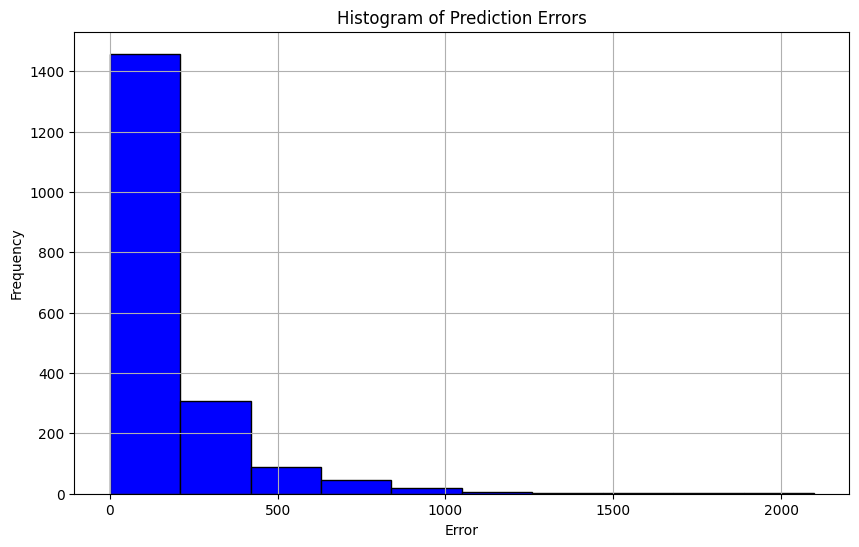

In [20]:
# Histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=10, color='blue', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()

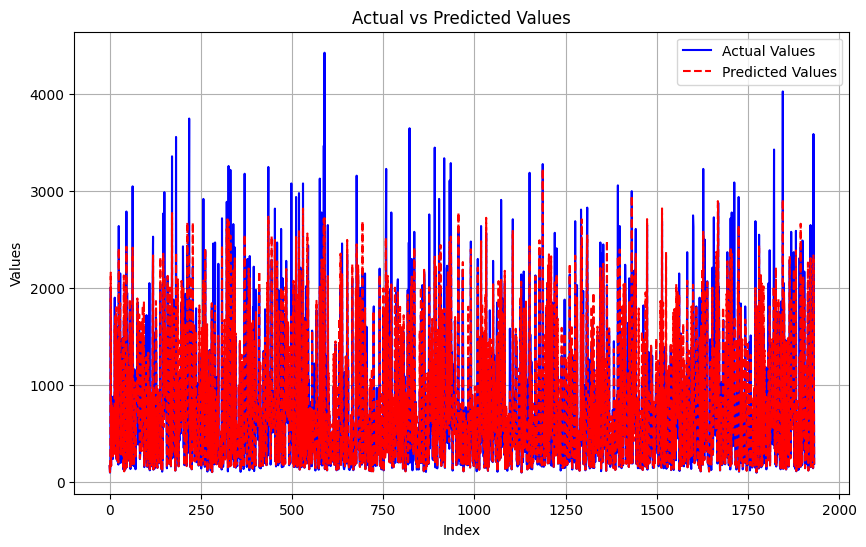

In [21]:
# Line plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_labels)), test_labels, color='blue', label='Actual Values')
plt.plot(range(len(predictions)), predictions, color='red', linestyle='--', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

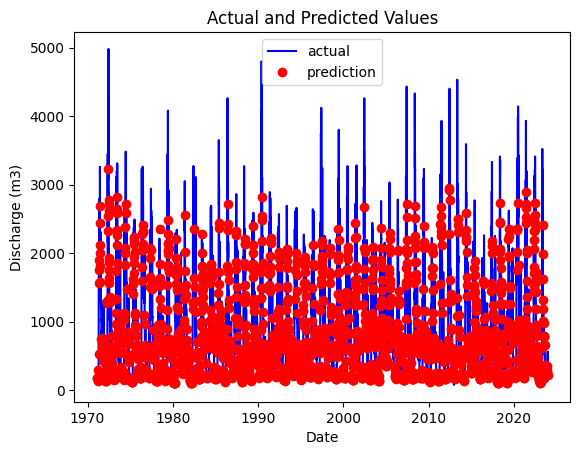

In [27]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
months = df[:, feature_list.index('Month')]
days = df[:, feature_list.index('Day')]
years = df[:, feature_list.index('Year')]
# List and then convert to datetime object

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates] 
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'discharge': labels})
# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the discharge values
plt.plot(true_data['date'], true_data['discharge'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 'horizontal'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Discharge (m3)'); plt.title('Actual and Predicted Values');

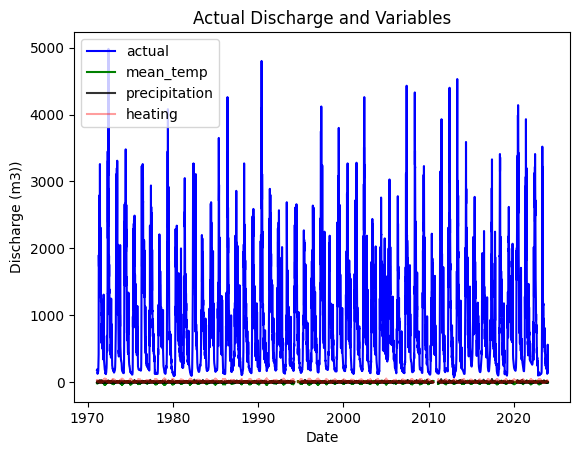

In [26]:
# Make the data accessible for plotting
true_data['mean_temp'] = df[:, feature_list.index('MEAN_TEMPERATURE3')]
true_data['precipitation'] = df[:, feature_list.index('TOTAL_PRECIPITATION3')]
true_data['heating'] = df[:, feature_list.index('HEATING_DEGREE_DAYS3')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['discharge'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['mean_temp'], 'g-', label  = 'mean_temp', alpha = 1.0)
plt.plot(true_data['date'], true_data['precipitation'], 'k-', label = 'precipitation', alpha = 0.8)
plt.plot(true_data['date'], true_data['heating'], 'r-', label = 'heating', alpha = 0.38)
# Formatting plot
plt.legend(); plt.xticks(rotation = 'horizontal')
# Lables and title
plt.xlabel('Date'); plt.ylabel('Discharge (m3))'); plt.title('Actual Discharge and Variables');

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')